In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

## Konfigurasi Kaggle dan Google Drive

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Pembelajaran Mesin'

In [ ]:
%cd /content/drive/MyDrive/Pembelajaran\ Mesin

/content/drive/.shortcut-targets-by-id/10c4Aw_2TfyRbC13KKGL0g5i-OqZIWoJI/Pembelajaran Mesin


In [ ]:
!ls

 flowers   kaggle.json	 tes  'Tugas Kelompok'


## Download Data set dari Kaggle

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 450M/450M [00:04<00:00, 133MB/s]



In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b

In [ ]:
!ls ./flowers/sunflower

1008566138_6927679c8a.jpg     3894586562_5dbbdc4354_n.jpg
1022552002_2b93faf9e7_n.jpg   3897174387_07aac6bf5f_n.jpg
1022552036_67d33d5bd8_n.jpg   3912497870_a2f91c3a65_n.jpg
10386503264_e05387e1f7_m.jpg  3912497888_e7a5905bc3_n.jpg
10386522775_4f8c616999_m.jpg  3920137864_e922ab25b4_n.jpg
10386525005_fd0b7d6c55_n.jpg  3922005347_7b6fb82fcd.jpg
10386525695_2c38fea555_n.jpg  39271782_b4335d09ae_n.jpg
10386540106_1431e73086_m.jpg  3946535195_9382dcb951_n.jpg
10386540696_0a95ee53a8_n.jpg  3946535709_78613461cb_n.jpg
10386702973_e74a34c806_n.jpg  3950020811_dab89bebc0_n.jpg
1043442695_4556c4c13d_n.jpg   3951246342_930138610b_n.jpg
1044296388_912143e1d4.jpg     4019748730_ee09b39a43.jpg
10541580714_ff6b171abd_n.jpg  40410686_272bc66faf_m.jpg
1064662314_c5a7891b9f_m.jpg   40410814_fba3837226_n.jpg
10862313945_e8ed9202d9_m.jpg  40410963_3ac280f23a_n.jpg
11881770944_22b4f2f8f6_n.jpg  40411019_526f3fc8d9_m.jpg
1217254584_4b3028b93d.jpg     40411100_7fbe10ec0f_n.jpg
12282924083_fb80aa17d4_n.jpg  

## Cek Jumlah Data set

In [ ]:
# %cd flowers/dandelion
# %cd ../rose
%cd ../sunflower

!ls -l | grep ^- | wc -l

/content/drive/.shortcut-targets-by-id/10c4Aw_2TfyRbC13KKGL0g5i-OqZIWoJI/Pembelajaran Mesin/flowers/sunflower
734


# Fungsi-Fungsi

In [ ]:
import os, cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

## Pemrosesan Citra (load, resize, grayscale)

In [ ]:
def loadImages(path):
  image_files = [cv2.imread(os.path.join(path, file)) for file in os.listdir(path)[0:100]] # Mengambil image dari directory drive
  return image_files

def resizeImages(dim, images):
  image_files = [cv2.resize(image, dim, interpolation = cv2.INTER_AREA) for image in images] # Resize gambar menjadi dimensi yang ditentukan
  return image_files

def grayscaleImages(images):
  image_files = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images] # Color image processing dari rgb menjadi grayscale
  return image_files

In [ ]:
def ImageProcessing(path):
  dim = (320, 240) # Ukuran resize
  img=loadImages(path)
  img=resizeImages(dim, img)
  img=grayscaleImages(img)
  return img

## Visualisasi dan Analisis Citra

In [ ]:
def visualizeImages(image, name):
  plt.figure(figsize=(8,6))
  plt.hist(sunflowers[0], bins='auto')
  plt.title('Histogram'+name)
  plt.xlabel('Gray Level')
  plt.ylabel('Occurence (# of pixels)')
  plt.show()

In [ ]:
def visualizeHistogramAvg(data, name):
  plt.figure(figsize=(8,6))
  plt.bar([i for i in range(256)], data)
  plt.title('Histogram Average for '+name)
  plt.xlabel('Gray Level')
  plt.ylabel('Average Occurence (# of pixels)')
  plt.show()

## Splitting and Shuffling

In [ ]:
def data_splitting(data, train_size):
  train_num=int(train_size*len(data[0])); test_num=int(len(data[0])-train_num)
  
  X_train = data[0][:train_num]+data[1][:train_num]+data[2][:train_num]
  X_test = data[0][-test_num:]+data[1][-test_num:]+data[2][-test_num:]
  y_train = [0 for i in range(train_num)]+[1 for i in range(train_num)]+[2 for i in range(train_num)]
  y_test = [0 for i in range(test_num)]+[1 for i in range(test_num)]+[2 for i in range(test_num)]

  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
def data_shuffling(X_train, X_test, y_train, y_test):
  train=list(zip(X_train, y_train))
  random.shuffle(train)
  X_train=[data[0] for data in train]
  y_train=[data[-1] for data in train]

  test=list(zip(X_test, y_test))
  random.shuffle(test)
  X_test=[data[0] for data in test]
  y_test=[data[-1] for data in test]
  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Main Code

## Data Citra

In [ ]:
image_path = "/content/drive/MyDrive/Pembelajaran Mesin/flowers"
sunflowers=ImageProcessing(image_path + '/sunflower')
dandelions = ImageProcessing(image_path + '/dandelion')
roses = ImageProcessing(image_path + '/rose')

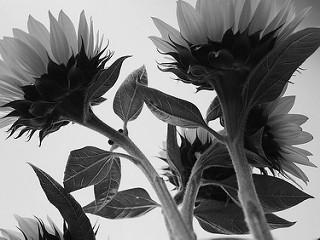

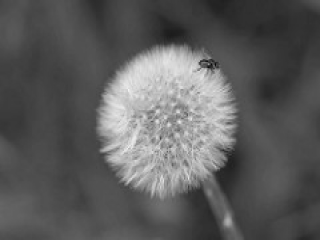

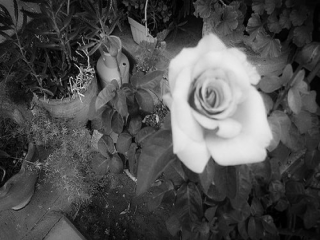

In [ ]:
cv2_imshow(sunflowers[-2])
cv2_imshow(dandelions[-2])
cv2_imshow(roses[-2])

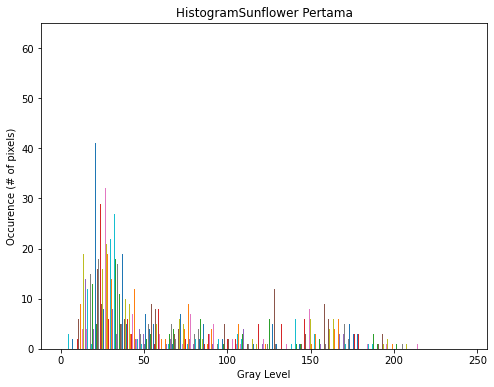

In [ ]:
visualizeImages(sunflowers[0],'Sunflower Pertama')

In [ ]:
sunflowers_hist_avg = [0 for i in range(256)]
dandelions_hist_avg = [0 for i in range(256)]
roses_hist_avg = [0 for i in range(256)]

In [ ]:
for sunflower in sunflowers:
  for i in range(240):
    for j in range(320):
      sunflowers_hist_avg[sunflower[i][j]] += 1

for i in range(256):
  sunflowers_hist_avg[i] /= 100

In [ ]:
for dandelion in dandelions:
  for i in range(240):
    for j in range(320):
      dandelions_hist_avg[dandelion[i][j]] += 1

for i in range(256):
  dandelions_hist_avg[i] /= 100

In [ ]:
for rose in roses:
  for i in range(240):
    for j in range(320):
      roses_hist_avg[rose[i][j]] += 1

for i in range(256):
  roses_hist_avg[i] /= 100

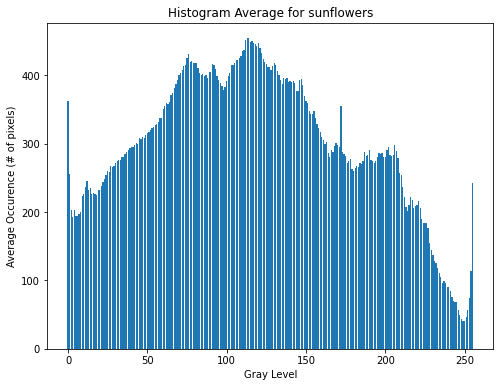

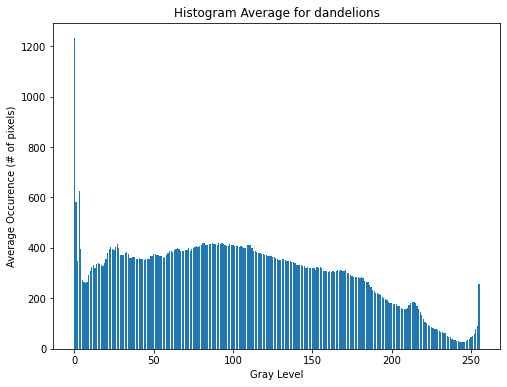

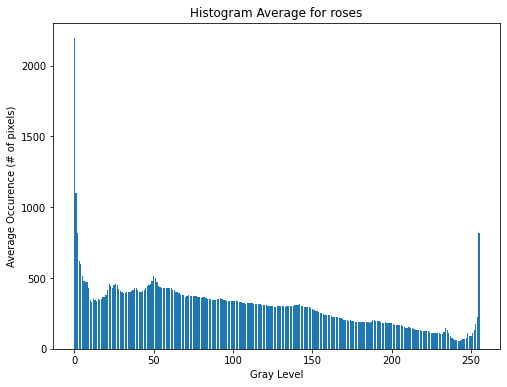

In [ ]:
visualizeHistogramAvg(sunflowers_hist_avg, 'sunflowers')
visualizeHistogramAvg(dandelions_hist_avg, 'dandelions')
visualizeHistogramAvg(roses_hist_avg, 'roses')

In [ ]:
data=[sunflowers, dandelions, roses]
X_train, X_test, y_train, y_test=data_splitting(data, 0.8)

In [ ]:
# X_train, X_test, y_train, y_test=data_shuffling(X_train, X_test, y_train, y_test)

## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240,320,1)),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),   
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 106, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 106, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 104, 8)        4616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 34, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 34, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0

In [ ]:
if str(X_train.shape) == "(240, 240, 320)":
    X_train = np.expand_dims(X_train, axis=3)
    
if str(X_test.shape) == "(60, 240, 320)":
    X_test = np.expand_dims(X_test, axis=3)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    X_train,
    y=y_train,
    batch_size=16,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.
)

validation_generator = validation_datagen.flow(
    X_test,
    y=y_test,
    batch_size=10
)

In [ ]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=15, validation_data = validation_generator, validation_steps=6, verbose = 1)

Epoch 1/50
15/15 [==============================] - 2s 94ms/step - loss: 1.1176 - accuracy: 0.3625 - val_loss: 1.0970 - val_accuracy: 0.4333
Epoch 2/50
15/15 [==============================] - 1s 85ms/step - loss: 1.0998 - accuracy: 0.3500 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 1s 86ms/step - loss: 1.1019 - accuracy: 0.3083 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 1s 85ms/step - loss: 1.1009 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 1s 86ms/step - loss: 1.0990 - accuracy: 0.3458 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 1s 86ms/step - loss: 1.1032 - accuracy: 0.3208 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 1s 87ms/step - loss: 1.1022 - accuracy: 0.3000 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 8/50
15

# Learning Rate = 0.1

## Tanpa Augmentation

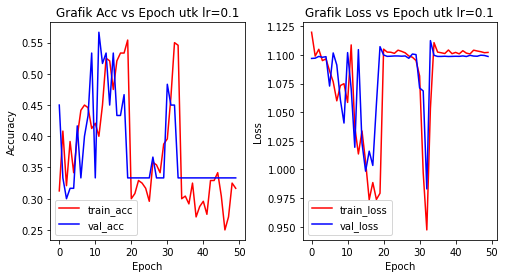

In [ ]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.1')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.1')
ax[1].legend()

## Augmentation

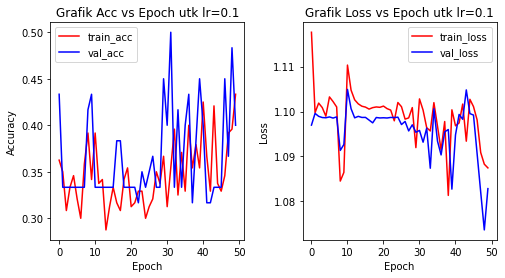

In [ ]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.1')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.1')
ax[1].legend()

# Learning Rate = 0.8

## Tanpa Augmentation

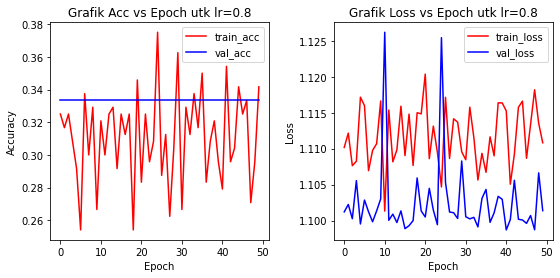

In [ ]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.8')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.8')
ax[1].legend()

## Augmentation

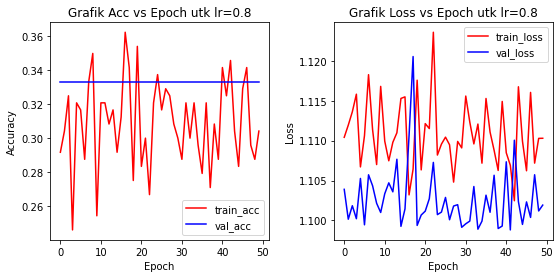

In [ ]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.8')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.8')
ax[1].legend()